# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Suppress Pandas SettingWithCopyWarning
pd.options.mode.chained_assignment = None

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [23]:
df = pd.read_csv('../data/states_edu.csv')
df.head(10)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,50648.0,45025.0,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN
6,1992_CONNECTICUT,CONNECTICUT,1992,NaN,3834302.0,143542.0,1342539.0,2348221.0,3721338.0,2148041.0,...,38058.0,33691.0,28366.0,NaN,NaN,488476.0,227.0,274.0,222.0,NaN
7,1992_DELAWARE,DELAWARE,1992,NaN,645233.0,45945.0,420942.0,178346.0,638784.0,372722.0,...,8272.0,8012.0,6129.0,NaN,NaN,104321.0,218.0,263.0,213.0,NaN
8,1992_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,1992,NaN,709480.0,64749.0,0.0,644731.0,742893.0,329160.0,...,5832.0,5000.0,3433.0,NaN,NaN,80937.0,193.0,235.0,188.0,NaN
9,1992_FLORIDA,FLORIDA,1992,NaN,11506299.0,788420.0,5683949.0,5033930.0,11305642.0,5166374.0,...,164416.0,142372.0,100835.0,NaN,NaN,1981407.0,214.0,260.0,208.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [4]:
# change ENROLL's name for clarity that it represents the Bureau's estimate
df.rename({
    'ENROLL':'ENROLL_EST'
    },
    axis=1,inplace=True)

In [6]:
# I want to explore Grade 8 Math later, so check how many NaN there are
df["AVG_MATH_8_SCORE"].isna().sum()

1113

In [12]:
# fill missing data in AVG_MATH_8_SCORE with median
df["AVG_MATH_8_SCORE"] = df["AVG_MATH_8_SCORE"].fillna(df["AVG_MATH_8_SCORE"].median)
df["AVG_MATH_8_SCORE"].isna().sum()

0

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: *Grade 8 Math*

How many years of data are logged in our dataset? 

In [16]:
# there are 33 different years of data
df["YEAR"].nunique()

33

In [14]:
# from 1986 - 2019
df["YEAR"].describe()

count    1715.000000
mean     2002.075219
std         9.568621
min      1986.000000
25%      1994.000000
50%      2002.000000
75%      2010.000000
max      2019.000000
Name: YEAR, dtype: float64

In [18]:
# missing data from year 2018
df["YEAR"].unique()

array([1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 1986, 1987, 1988, 1989, 1990, 1991, 2017, 2019])

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [101]:
# group by STATE and find the mean of the four scores throughout different years 
# then sum and divide by four to find the average outcome score, store it in a new column AVG_OUTCOME_SCORE
states = df.groupby("STATE")
states_all_years = states[["AVG_MATH_4_SCORE","AVG_READING_4_SCORE","AVG_MATH_8_SCORE","AVG_READING_8_SCORE"]].mean()
states_all_years["AVG_OUTCOME_SCORE"] = states_all_years[["AVG_MATH_4_SCORE","AVG_READING_4_SCORE","AVG_MATH_8_SCORE","AVG_READING_8_SCORE"]].sum(axis=1)/4

In [102]:
# compare the AVG_OUTCOME_SCORE of MICHIGAN and OHIO by checking if MICHIGAN is greater than OHIO
# it will return True or False
# use the True or False as a index of the list to print out the statement of which state has the higher score.
["Ohio has higher average outcome score", "Michigan has higher average outcome score"][states_all_years['AVG_OUTCOME_SCORE']['MICHIGAN'] > states_all_years['AVG_OUTCOME_SCORE']['OHIO']]

/var/folders/57/l7wblc_s63lf8w2lgjwg8sgr0000gn/T/ipykernel_46769/1720669980.py:4: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  ["Ohio has higher average outcome score", "Michigan has higher average outcome score"][states_all_years['AVG_OUTCOME_SCORE']['MICHIGAN'] > states_all_years['AVG_OUTCOME_SCORE']['OHIO']]


'Ohio has higher average outcome score'

Find the average for your outcome score across all states in 2019

In [80]:
# group by years and find the average outcome score
# find the value in 2019
years = df.groupby("YEAR")
((years[["AVG_MATH_4_SCORE","AVG_READING_4_SCORE","AVG_MATH_8_SCORE","AVG_READING_8_SCORE"]].mean()).sum(axis=1)/4)[2019]

250.89150943396226

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [100]:
# group by STATE and YEAR and find the mean of the four scores in different years 
# store in new dataframe df_state_and_year
# then sum and divide by four to find the average outcome score, store it in a new column OUTCOME_SCORE
# group the new dataframe df_state_and_year by STATE and find their OUTCOME_SCORE max of all the years
state_and_year = df.groupby(["STATE","YEAR"])
df_state_and_year = state_and_year[["AVG_MATH_4_SCORE","AVG_READING_4_SCORE","AVG_MATH_8_SCORE","AVG_READING_8_SCORE"]].mean()
df_state_and_year["OUTCOME_SCORE"] = df_state_and_year[["AVG_MATH_4_SCORE","AVG_READING_4_SCORE","AVG_MATH_8_SCORE","AVG_READING_8_SCORE"]].sum(axis=1)/4
df_state_and_year.groupby(["STATE"])["OUTCOME_SCORE"].max()

STATE
ALABAMA                 244.50
ALASKA                  248.25
ARIZONA                 249.75
ARKANSAS                249.75
CALIFORNIA              246.75
COLORADO                258.75
CONNECTICUT             258.75
DELAWARE                254.25
DISTRICT_OF_COLUMBIA    242.00
DODEA                   264.25
FLORIDA                 255.00
GEORGIA                 251.50
HAWAII                  249.75
IDAHO                   254.25
ILLINOIS                252.50
INDIANA                 258.25
IOWA                    256.00
KANSAS                  257.50
KENTUCKY                254.25
LOUISIANA               243.25
MAINE                   257.25
MARYLAND                259.50
MASSACHUSETTS           266.00
MICHIGAN                250.00
MINNESOTA               261.50
MISSISSIPPI             247.50
MISSOURI                254.50
MONTANA                 258.75
NATIONAL                254.25
NEBRASKA                256.75
NEVADA                  247.50
NEW_HAMPSHIRE           263.75
NE

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [114]:
# create new column EXPENDITURE_PER_STUDENT and INSTRUCTION_EXPENDITURE_PER_STUDENT
df["TOTAL_EXPENDITURE_PER_STUDENT"] = df["TOTAL_EXPENDITURE"] / df["GRADES_ALL_G"]
df["INSTRUCTION_EXPENDITURE_PER_STUDENT"] = df["INSTRUCTION_EXPENDITURE"] / df["GRADES_ALL_G"]
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,INSTRUCTION_EXPENDITURE_PER_STUDENT,TOTAL_EXPENDITURE_PER_STUDENT
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN,2.025197,3.627221
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN,4.068693,7.939520
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN,2.132082,5.050774
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN,2.184247,3.948044
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN,2.732512,5.164536


Feature engineering justification: **<I created two new columns called EXPENDITURE_PER_STUDENT and INSTRUCTION_EXPENDITURE_PER_STUDENT, so I could analyze if the total expenditure and intruction expenditure affect a state's students' overall academic performance\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, '8th Grade Math Score')

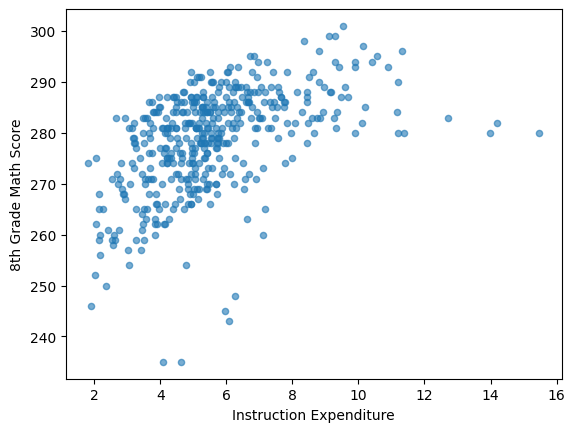

In [115]:
df.plot.scatter(x='INSTRUCTION_EXPENDITURE_PER_STUDENT', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('Instruction Expenditure')
plt.ylabel('8th Grade Math Score')

**<Instruction Expenditure does not have a linear relationship with math score of 8th Grade students, but there still seems to be some pattern>**

**Visualization 2**

Text(0, 0.5, '8th Grade Math Score')

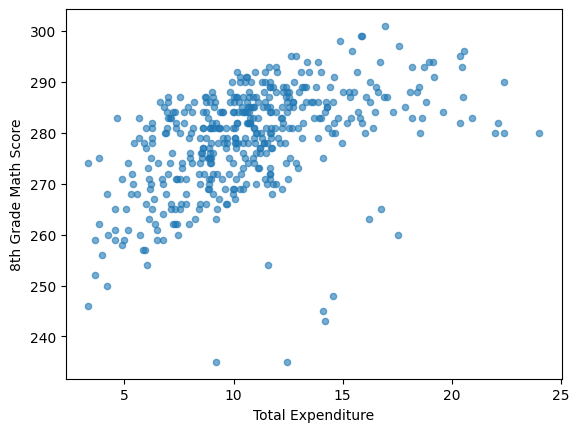

In [118]:
df.plot.scatter(x='TOTAL_EXPENDITURE_PER_STUDENT', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('Total Expenditure')
plt.ylabel('8th Grade Math Score')

**<Total Expenditure does not have an linear relationship with math score of 8th Grade students either, but maybe it still affects?>**

**Visualization 3**

Text(0, 0.5, '8th Grade Math Score')

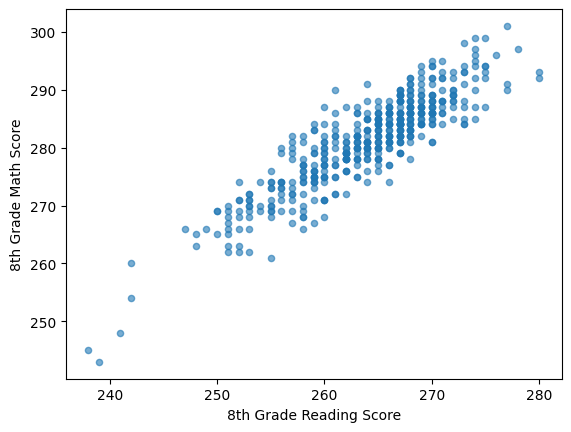

In [119]:
df.plot.scatter(x='AVG_READING_8_SCORE', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('8th Grade Reading Score')
plt.ylabel('8th Grade Math Score')

**<8th Grade Reading Score has a direct relationship with math score of 8th Grade students!>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [120]:
from sklearn.model_selection import train_test_split

In [124]:
# my inputs are number of students in grade 8, average reading score in grade 8, and instuction expenditure
# to predict average math score in grade 8
X = df[['GRADES_8_G','AVG_READING_8_SCORE','INSTRUCTION_EXPENDITURE_PER_STUDENT']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']
y.fillna(y.median(), inplace=True)

In [125]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [128]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor


In [143]:
# create your model here
model2 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

In [144]:
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [145]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [146]:
# R^2 value describes how well a linear model fits the data
model.score(X_test, y_test)

0.534773803986934

In [147]:
# mean error
np.mean(model.predict(X_test)-y_test)

0.26443101035436517

In [148]:
# root mean squared error -- penalizes large errors
np.mean((model.predict(X_test)-y_test)**2)**0.5

4.792283262227937

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

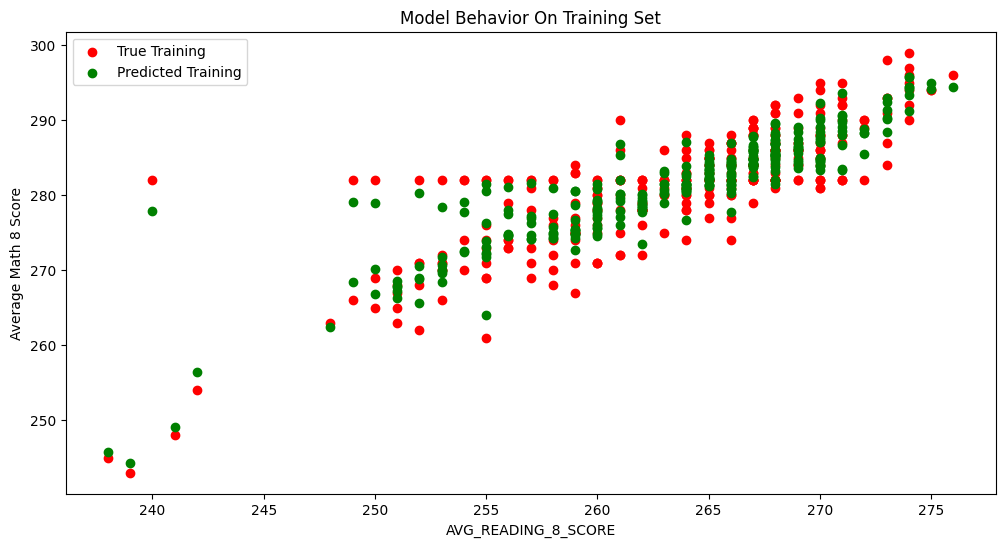

In [149]:
col_name = 'AVG_READING_8_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Average Math 8 Score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

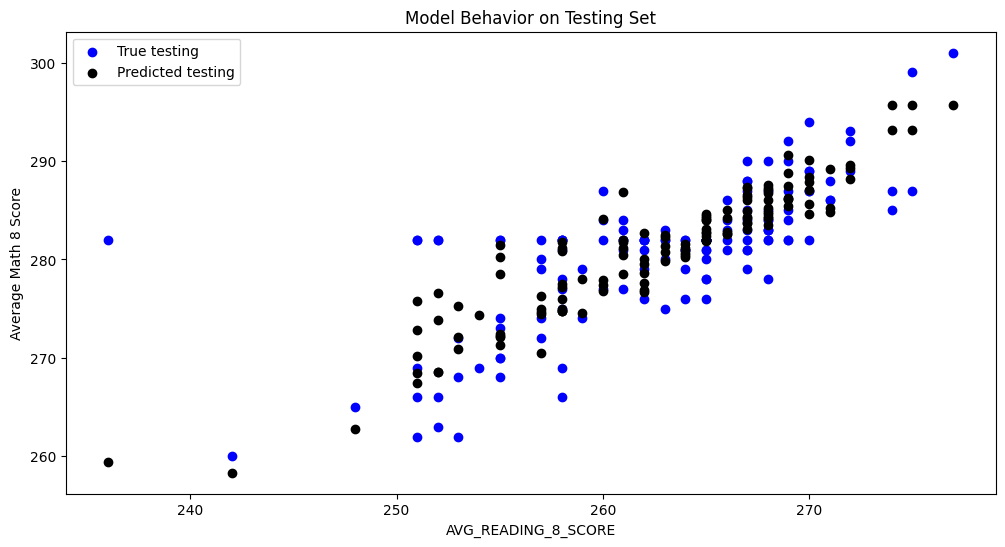

In [151]:
col_name = 'AVG_READING_8_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Average Math 8 Score')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

*<I cleaned up data and picked out some features that might affect the Average Grade 8 Math Score that I want to predict. I created new columns with Instruction Expenditure per Students and Total Expenditure per Students, and found through visualization that they have some relationship to the Average Grade 8 Math Score but it is not linear. I also visualized Average Grade 8 Reading Score and found that it has a more direct and linear relationship to Grade 8 Math Score. I then chose to predict with total number of 8th grade enrollement, Instruction Expenditure, and 8th grade reading score. I also filled na in my predicator with median. I wanted to experiment with a different model than the tutorial so I used GradientBoostRegressor and got a R^2 of 0.535. From the evaluation metrics and model behavior graphs, I can see that my model explains a large portion of the data, but there are definitely rooms to make it a better fit.\>*